In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_src = r"E:\data\From server\24 Hour Stacks\2018-07_30 trab7\0010\Brightfield - Prosilica\*tif"

In [3]:
og = OG.BasicOpticalGating()
og.sequence_manager.set_source(data_src)
og.run()

Setting source to E:\data\From server\24 Hour Stacks\2018-07_30 trab7\0010\Brightfield - Prosilica\*tif
Getting reference sequence
Getting SADs
Getting phases


In [4]:
print(og.sequence_manager.reference_period)

32.939802089059924


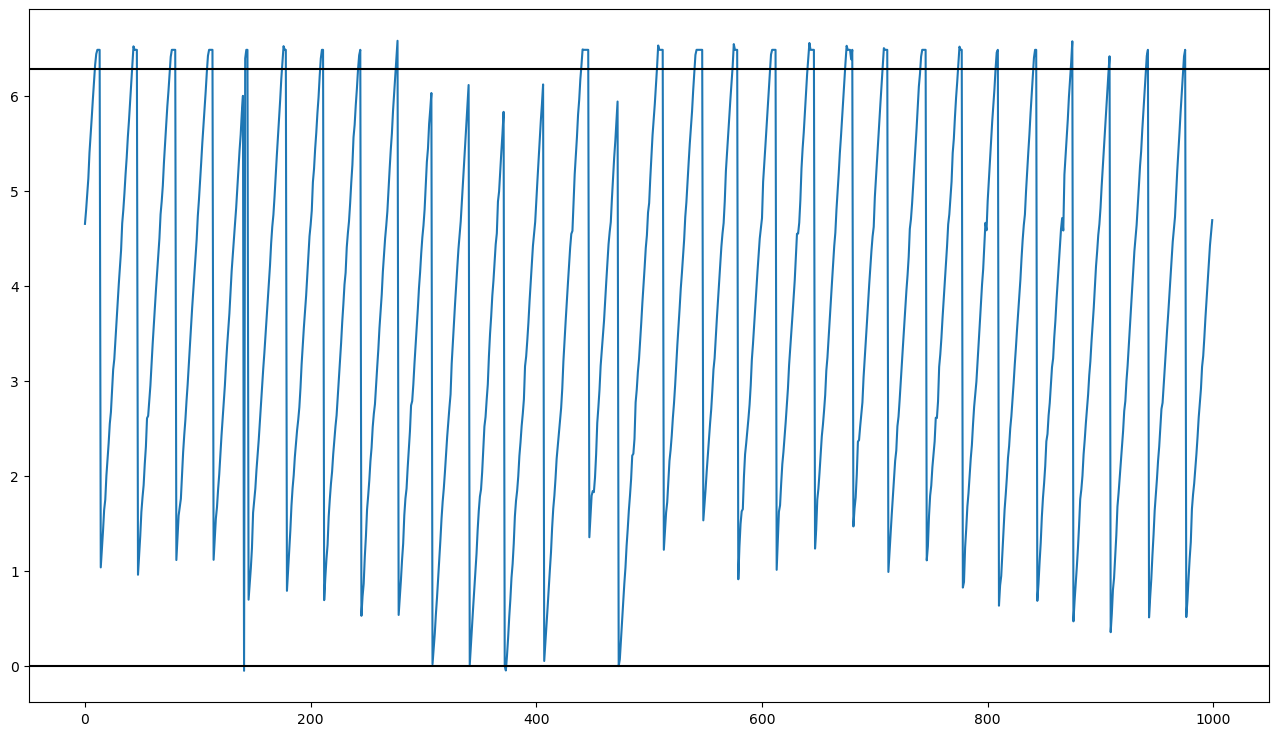

In [5]:
plt.figure(figsize = (16,9))
plt.plot(og.phases[1000:2000])
plt.axhline(0, c = "black")
plt.axhline(2 * np.pi, c = "black")

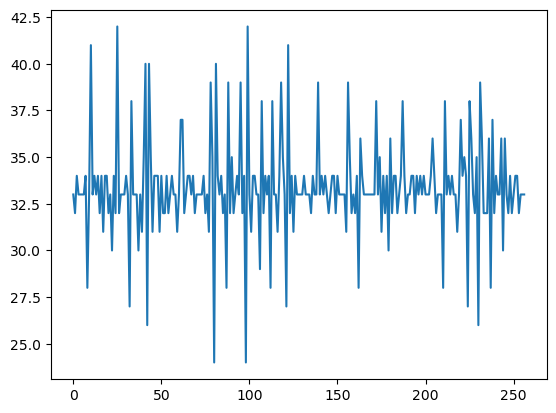

[47, 80, 112, 146, 179, 212, 245, 278, 312, 340, 373, 414, 447, 481, 514, 548, 580, 614, 645, 679, 713, 745, 778, 808, 842, 874, 916, 948, 981, 1014, 1047, 1081, 1114, 1141, 1179, 1212, 1245, 1278, 1308, 1341, 1372, 1407, 1447, 1473, 1513, 1548, 1579, 1613, 1647, 1681, 1712, 1746, 1778, 1810, 1844, 1876, 1909, 1943, 1976, 2009, 2040, 2073, 2110, 2147, 2179, 2212, 2246, 2280, 2313, 2347, 2379, 2412, 2445, 2478, 2511, 2545, 2577, 2610, 2641, 2680, 2715, 2739, 2779, 2813, 2846, 2880, 2912, 2945, 2973, 3012, 3044, 3079, 3111, 3144, 3178, 3211, 3250, 3282, 3316, 3340, 3382, 3415, 3446, 3480, 3514, 3547, 3580, 3609, 3647, 3679, 3713, 3746, 3780, 3808, 3846, 3879, 3912, 3943, 3977, 4016, 4051, 4084, 4111, 4152, 4184, 4218, 4249, 4283, 4316, 4349, 4382, 4415, 4449, 4482, 4515, 4548, 4580, 4614, 4647, 4680, 4719, 4752, 4786, 4819, 4853, 4886, 4918, 4951, 4985, 5019, 5051, 5085, 5118, 5151, 5184, 5217, 5248, 5287, 5322, 5354, 5387, 5419, 5453, 5481, 5517, 5551, 5584, 5617, 5650, 5683, 5716, 5749

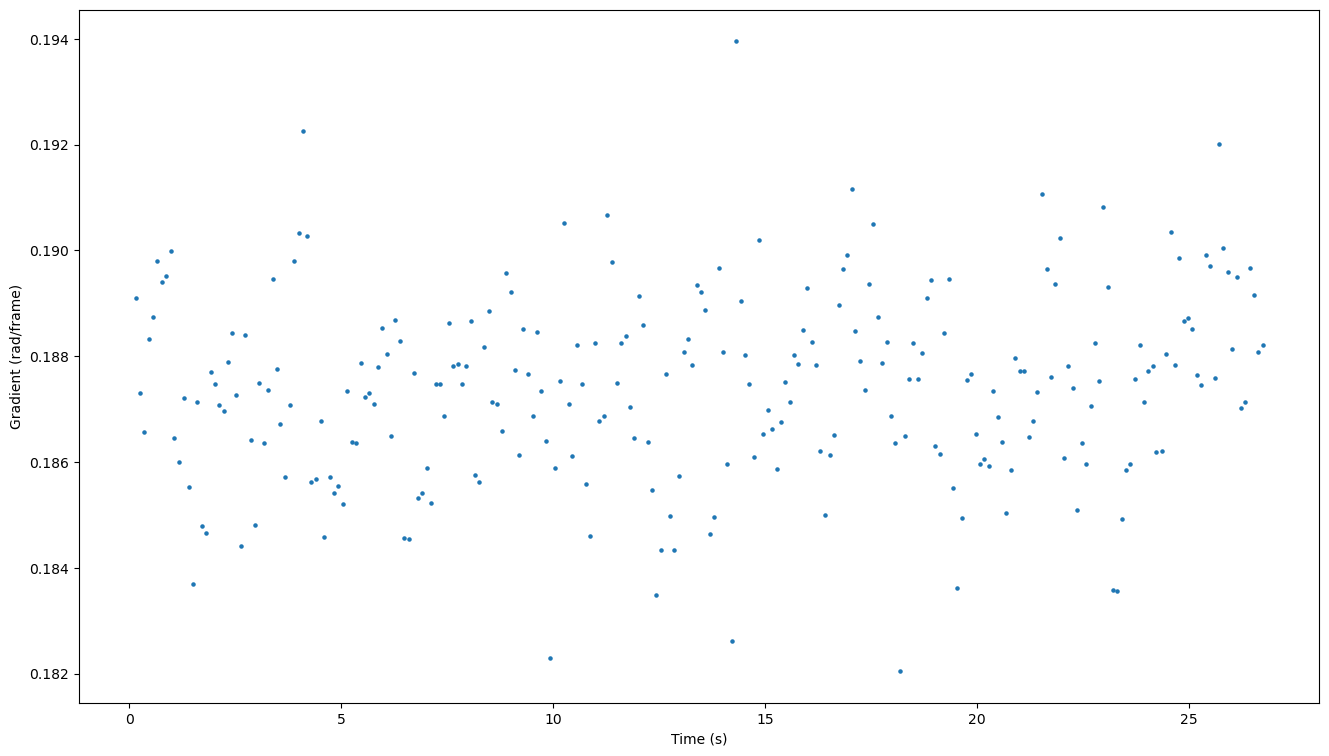

In [12]:
i_prev = 0
beat_indices = []
for i in range(1, og.phases.shape[0]):
    if (og.phases[i] - og.phases[i - 1]) < -np.pi:
        if abs(i_prev - i) > 13:
            beat_indices.append(i)
            i_prev = i

plt.plot(np.diff(beat_indices))
plt.show()

print(beat_indices)
gradients = []
from scipy.optimize import curve_fit
for i in range(len(beat_indices) - 2):
    xs = range(beat_indices[i], beat_indices[i+2])
    ys = og.unwrapped_phases[beat_indices[i]:beat_indices[i+2]]
    popt, popc = curve_fit(lambda x, a, b: a * x + b, xs, ys)
    gradients.append(popt[0])

plt.figure(figsize = (16,9))
plt.scatter(np.array(beat_indices[:-2]) / 320, gradients, s = 5)
#plt.ylim(0.006, 0.011)
plt.xlabel("Time (s)")
plt.ylabel("Gradient (rad/frame)")
plt.show()